<a href="https://colab.research.google.com/github/HarshitaViswanadham/YoutubeTranscriptSummarizer/blob/main/CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q transformers

     |████████████████████████████████| 2.5MB 3.9MB/s 
     |████████████████████████████████| 3.3MB 42.7MB/s 
     |████████████████████████████████| 901kB 40.6MB/s 


In [ ]:
!pip install -q youtube_transcript_api

In [ ]:
!pip install summa

     |████████████████████████████████| 61kB 2.4MB/s 
  Created wheel for summa: filename=summa-1.2.0-cp37-none-any.whl size=54411 sha256=cac429f9ef2dcf1e6f94150ebfb7870bfab11aa2209e832b326955fcc4e97109
  Stored in directory: /root/.cache/pip/wheels/6a/09/68/e2f2861c01d86407c3fa5220826ed7eed2abaa56b001be5970
Successfully built summa


In [ ]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [ ]:
youtube_video = "https://www.youtube.com/watch?v=aOL7wzEIZSc"

In [ ]:
video_id = youtube_video.split("=")[1]

In [ ]:
video_id

'aOL7wzEIZSc'

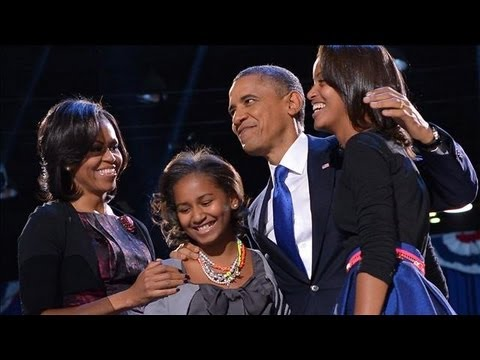

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [ ]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [ ]:
transcript[0:5]

[{'duration': 4.559, 'start': 1.87, 'text': '[Music]'},
 {'duration': 9.031,
  'start': 13.769,
  'text': 'tonight more than 200 years after a'},
 {'duration': 5.09,
  'start': 19.77,
  'text': 'former colony won the right to determine'},
 {'duration': 6.54, 'start': 22.8, 'text': 'its own destiny'},
 {'duration': 15.78,
  'start': 24.86,
  'text': 'the task of perfecting our union moves'}]

In [ ]:
result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

11353


In [ ]:
summarizer = pipeline('summarization')

In [ ]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  out = summarizer(result[start:end], min_length, max_length)
  out = out[0]
  out = out['summary_text']
  summarized_text.append(out)

text1 = summarized_text

print(summarized_text)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
Your max_length is set to 142, but you input_length is only 71. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


[' I want to thank every American who participated in this election whether you voted for the very first time or weighted it in wine for a very long time . We are an American family and we rise or fall together as one nation and as one people tonight . We know in our hearts but for the United States of America the best is yet to come .', ' President Obama congratulates Mitt Romney and Paul Ryan on a hard-fought campaign . Michelle Obama says she has never been prouder to Michelle Obama . Biden says he has never loved Michelle Obama more than he has loved her . Biden: "I wouldn\'t be the man I am today without the woman who agreed to marry me 20 years ago"', " The president says he is proud of his campaign team and volunteers in the history of politics the best the best ever . He says he will always be grateful for everything that you've done and all the incredible work that you put in . 'I know that political campaigns can sometimes seem small even silly and that provides plenty of fod

In [ ]:
print(text1)

[' I want to thank every American who participated in this election whether you voted for the very first time or weighted it in wine for a very long time . We are an American family and we rise or fall together as one nation and as one people tonight . We know in our hearts but for the United States of America the best is yet to come .', ' President Obama congratulates Mitt Romney and Paul Ryan on a hard-fought campaign . Michelle Obama says she has never been prouder to Michelle Obama . Biden says he has never loved Michelle Obama more than he has loved her . Biden: "I wouldn\'t be the man I am today without the woman who agreed to marry me 20 years ago"', " The president says he is proud of his campaign team and volunteers in the history of politics the best the best ever . He says he will always be grateful for everything that you've done and all the incredible work that you put in . 'I know that political campaigns can sometimes seem small even silly and that provides plenty of fod

In [ ]:
from summa.summarizer import summarize

In [ ]:
text = str(text1)

In [ ]:
print(text)

[' I want to thank every American who participated in this election whether you voted for the very first time or weighted it in wine for a very long time . We are an American family and we rise or fall together as one nation and as one people tonight . We know in our hearts but for the United States of America the best is yet to come .', ' President Obama congratulates Mitt Romney and Paul Ryan on a hard-fought campaign . Michelle Obama says she has never been prouder to Michelle Obama . Biden says he has never loved Michelle Obama more than he has loved her . Biden: "I wouldn\'t be the man I am today without the woman who agreed to marry me 20 years ago"', " The president says he is proud of his campaign team and volunteers in the history of politics the best the best ever . He says he will always be grateful for everything that you've done and all the incredible work that you put in . 'I know that political campaigns can sometimes seem small even silly and that provides plenty of fod

In [ ]:
summarize(text, ratio = 0.5)

'We know in our hearts but for the United States of America the best is yet to come .\', \' President Obama congratulates Mitt Romney and Paul Ryan on a hard-fought campaign .\nMichelle Obama says she has never been prouder to Michelle Obama .\nBiden says he has never loved Michelle Obama more than he has loved her .\nBiden: "I wouldn\\\'t be the man I am today without the woman who agreed to marry me 20 years ago"\', " The president says he is proud of his campaign team and volunteers in the history of politics the best the best ever .\nHe says he will always be grateful for everything that you\'ve done and all the incredible work that you put in .\nWe believe in a generous America in a compassionate America in compassionate America  in a tolerant America open to the dreams of an immigrants daughter who studies in our schools .", \' President Barack Obama returns to the White House more determined and more inspired than ever about the work there is to do and the future of the blazing 

In [ ]:
!pip install googletrans==3.1.0a0

     |████████████████████████████████| 61kB 2.4MB/s 
     |████████████████████████████████| 51kB 3.8MB/s 
     |████████████████████████████████| 1.0MB 4.9MB/s 
     |████████████████████████████████| 71kB 5.6MB/s 
     |████████████████████████████████| 61kB 5.6MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-cp37-none-any.whl size=16368 sha256=191b0141eb14bcdd9442d669a8f7a36425e98be36795d5c2c1b2d6a49c449308
  Stored in directory: /root/.cache/pip/wheels/27/7a/a0/aff3babbb775549ce6813cb8fa7ff3c0848c4dc62c20f8fdac
Successfully built googletrans


In [ ]:
from googletrans import Translator
translator = Translator()
out = translator.translate(text, dest='hi')
print(out)

Translated(src=en, dest=hi, text=[' मैं इस चुनाव में भाग लेने वाले हर अमेरिकी को धन्यवाद देना चाहता हूं, चाहे आपने पहली बार मतदान किया हो या बहुत लंबे समय तक इसे शराब में तौला। हम एक अमेरिकी परिवार हैं और हम आज रात एक राष्ट्र और एक व्यक्ति के रूप में एक साथ उठते या गिरते हैं। हम अपने दिल में जानते हैं लेकिन संयुक्त राज्य अमेरिका के लिए सबसे अच्छा आना अभी बाकी है।', 'राष्ट्रपति ओबामा ने मिट रोमनी और पॉल रयान को एक कठिन अभियान पर बधाई दी। मिशेल ओबामा का कहना है कि उन्हें कभी भी मिशेल ओबामा पर गर्व नहीं रहा। बाइडेन का कहना है कि उन्होंने कभी भी मिशेल ओबामा से जितना प्यार किया है उससे ज्यादा प्यार कभी नहीं किया। बिडेन: "मैं वह पुरुष नहीं होता जो आज मैं उस महिला के बिना हूं जो 20 साल पहले मुझसे शादी करने के लिए सहमत हुई थी"', "राष्ट्रपति कहते हैं कि उन्हें अपनी अभियान टीम और राजनीति के इतिहास में स्वयंसेवकों पर सबसे अच्छा सबसे अच्छा गर्व है कभी भी। वह कहता है कि वह हमेशा आपके द्वारा किए गए सभी अविश्वसनीय कार्यों और आपके द्वारा किए गए सभी अविश्वसनीय कार्यों के लिए आभारी रहेगा। 'मुझे पता है क

In [ ]:
from googletrans import Translator
translator = Translator()
out = translator.translate(text, dest='hi')
print(out.text)

[' मैं इस चुनाव में भाग लेने वाले हर अमेरिकी को धन्यवाद देना चाहता हूं, चाहे आपने पहली बार मतदान किया हो या बहुत लंबे समय तक इसे शराब में तौला। हम एक अमेरिकी परिवार हैं और हम आज रात एक राष्ट्र और एक व्यक्ति के रूप में एक साथ उठते या गिरते हैं। हम अपने दिल में जानते हैं लेकिन संयुक्त राज्य अमेरिका के लिए सबसे अच्छा आना अभी बाकी है।', 'राष्ट्रपति ओबामा ने मिट रोमनी और पॉल रयान को एक कठिन अभियान पर बधाई दी। मिशेल ओबामा का कहना है कि उन्हें कभी भी मिशेल ओबामा पर गर्व नहीं रहा। बाइडेन का कहना है कि उन्होंने कभी भी मिशेल ओबामा से जितना प्यार किया है उससे ज्यादा प्यार कभी नहीं किया। बिडेन: "मैं वह पुरुष नहीं होता जो आज मैं उस महिला के बिना हूं जो 20 साल पहले मुझसे शादी करने के लिए सहमत हुई थी"', "राष्ट्रपति कहते हैं कि उन्हें अपनी अभियान टीम और राजनीति के इतिहास में स्वयंसेवकों पर सबसे अच्छा सबसे अच्छा गर्व है कभी भी। वह कहता है कि वह हमेशा आपके द्वारा किए गए सभी अविश्वसनीय कार्यों और आपके द्वारा किए गए सभी अविश्वसनीय कार्यों के लिए आभारी रहेगा। 'मुझे पता है कि राजनीतिक अभियान कभी-कभी मूर्खता

In [ ]:
from googletrans import Translator
translator = Translator()
out = translator.translate(text, dest='te')
print(out.text)

['ఈ ఎన్నికల్లో పాల్గొన్న ప్రతి అమెరికన్‌కు మీరు మొదటిసారి ఓటు వేసినా లేదా వైన్‌లో బరువు పెట్టినా చాలా కాలం పాటు కృతజ్ఞతలు తెలుపుతున్నాను. మేము ఒక అమెరికన్ కుటుంబం మరియు మేము ఒక దేశంగా మరియు ఈ రాత్రి ఒక ప్రజలుగా కలిసిపోతాము. మా హృదయాల్లో మాకు తెలుసు, కాని యునైటెడ్ స్టేట్స్ ఆఫ్ అమెరికాకు ఇంకా ఉత్తమమైనది రాదు. ',' అధ్యక్షుడు ఒబామా మిట్ రోమ్నీ మరియు పాల్ ర్యాన్‌లను గట్టిగా పోరాడినందుకు అభినందించారు. మిచెల్ ఒబామాతో తాను ఎప్పుడూ ప్రవర్తించలేదని మిచెల్ ఒబామా చెప్పారు. మిచెల్ ఒబామాను తాను ప్రేమించిన దానికంటే ఎక్కువగా ప్రేమించలేదని బిడెన్ చెప్పారు. బిడెన్: "20 సంవత్సరాల క్రితం నన్ను వివాహం చేసుకోవడానికి అంగీకరించిన మహిళ లేకుండా నేను ఈ రోజు మనిషిని కాను" "అని అధ్యక్షుడు తన ప్రచార బృందం మరియు రాజకీయ చరిత్రలో వాలంటీర్లను గర్విస్తున్నానని చెప్పారు. ఎప్పుడైనా. మీరు చేసిన ప్రతిదానికీ మరియు మీరు పెట్టిన అన్ని అద్భుతమైన పనికి ఆయన ఎల్లప్పుడూ కృతజ్ఞతలు తెలుపుతారని ఆయన చెప్పారు. 'రాజకీయ ప్రచారాలు కొన్నిసార్లు చిన్నవిగా కూడా కనిపిస్తాయని నాకు తెలుసు మరియు అది వారు చెప్పే సైనీలకు పశుగ్రాసం పుష్కలంగా అందిస్త

In [ ]:
from googletrans import Translator
translator = Translator()
out = translator.translate(text, dest='ur')
print(out.text)

['میں ان امریکیوں کا شکریہ ادا کرنا چاہتا ہوں جنہوں نے اس انتخاب میں حصہ لیا چاہے آپ نے پہلی بار ووٹ دیا یا بہت لمبے عرصے تک شراب میں اس کا وزن کیا۔ ہم ایک امریکی کنبہ ہیں اور ہم آج رات ایک قوم اور ایک ہی فرد کی حیثیت سے ایک ساتھ اٹھ کھڑے ہوئے ہیں۔ ہم اپنے دلوں میں جانتے ہیں لیکن ریاستہائے متحدہ امریکہ کے لئے ابھی سب سے بہتر ابھی باقی ہے۔ '،' صدر اوباما نے مٹ رومنی اور پال ریان کو سخت جدوجہد مہم پر مبارکباد پیش کی۔ مشیل اوباما کا کہنا ہے کہ وہ مشیل اوباما سے کبھی بھی محتاج نہیں رہیں۔ بائیڈن کا کہنا ہے کہ انہوں نے مشیل اوباما سے جتنا محبت کی اس سے زیادہ پیار کبھی نہیں کیا۔ بائیڈن: "میں آج کے دن میں اس مرد کے بغیر نہیں رہوں گا جس نے 20 سال قبل مجھ سے شادی کرنے پر راضی کیا تھا۔" ، "صدر کا کہنا ہے کہ انہیں اپنی انتخابی ٹیم پر فخر ہے اور سیاست کی تاریخ میں رضاکاروں کو سب سے بہتر ان کا کہنا ہے کہ وہ آپ کے کیے ہوئے سب کاموں اور ان تمام ناقابل یقین کاموں کے لئے ہمیشہ شکر گزار ہوں گے۔ 'میں جانتا ہوں کہ سیاسی مہمات بعض اوقات چھوٹی چھوٹی بھی لگ سکتی ہیں اور اس سے یہ کہتے ہیں کہ ان کا کہنا ہے کہ ا